In [1]:
import numpy as np

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt




from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Colab Notebooks/

epsilon=0.0001


d0 = pd.read_csv('train_data.csv')
print(d0.head(5)) 
l = d0['label']
d = d0.drop("label",axis=1)
print(d.shape)
print(l.shape)

labels = l.head(15000)
data = d.head(15000)

print("the shape of sample data = ", data.shape)







Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks
   label  pixel0  pixel1  pixel2  ...  pixel780  pixel781  pixel782  pixel783
0      1       0       0       0  ...         0         0         0         0
1      0       0       0       0  ...         0         0         0         0
2      1       0       0       0  ...         0         0         0         0
3      4       0       0       0  ...         0         0         0         0
4      0       0       0       0  ...         0         0         0         0

[5 rows x 785 columns]
(42000, 784)
(42000,)
the shape of sample data =  (15000, 784)


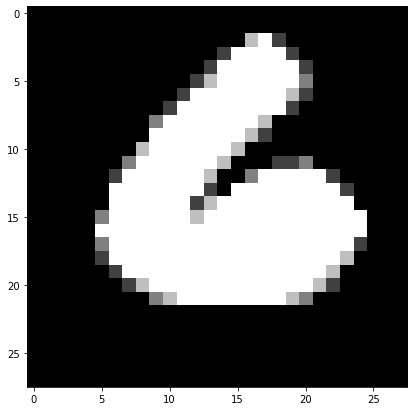

6


In [9]:

# display or plot a number.
plt.figure(figsize=(7,7))
idx = 500
grid_data = d.iloc[idx].to_numpy().reshape(28,28)  # reshape from 1d to 2d pixel array
plt.imshow(grid_data, interpolation = "none", cmap = "gray")
plt.show()

print(l[idx])


In [3]:




def iteration(A,index,first_component):
    v_iteration=np.random.rand(A.shape[0],1)#filling with random values
    shape_A=A.shape



    if index!=0:
        for i in range(shape_A[1]):
            A[:,i]=A[:,i]-first_component*np.dot(A[:,i],first_component)
    

    #for it in range(10000):
    converged=False
    while(converged==False):
        v_iteration_copy=v_iteration.copy()
        v_iteration=v_iteration/np.linalg.norm(v_iteration)

        u_i=[]
        for i in range(shape_A[1]):
            u_i.append(np.dot(A[:,i],v_iteration))


        sum_u_i_x_i=0
        sum_ui=0

        for i in range(shape_A[1]) :
            sum_u_i_x_i+=A[:,i]*u_i[i]
            sum_ui+=u_i[i]**2
        v_iteration=sum_u_i_x_i/sum_ui
        #print(np.linalg.norm(v_iteration_copy-v_iteration))
        if(np.linalg.norm(v_iteration_copy-v_iteration)<=epsilon):
            converged=True

    return v_iteration

def iterative_svd(X,nbr_components):
    A=np.matmul(X.transpose(),X)
    if nbr_components<=min(A.shape[0],A.shape[1]):
        v1=np.random.rand(A.shape[0],1)#filling with random values
        first_component=v1
        v_i=[]
        for index in range(nbr_components):
            element= iteration(A,index,first_component)
            if index==0:
                first_component=element
            else:
                first_component=v_i[index-1]
            
            v_i.append(element)

        V=np.array(v_i)
        return V
    else:
        print("the number of components should be equal or less  to min(dim_features,dim_samples)")
        return []
        

def scale_matrix(A):
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    scaler.fit(A)
    A=scaler.transform(A)
    return A




# projecting the original data sample on the plane 
#formed by two principal eigen vectors by vector-vector multiplication.

import matplotlib.pyplot as plt

def project_data_on_components(principal_components):
    new_coordinates = np.matmul(principal_components, sample_data.T)
    return new_coordinates


def data_visualize(coordinates):

    import pandas as pd
    import seaborn as sn

    coordinates = np.vstack((coordinates, labels)).T#Add labels to the vector 
    dataframe = pd.DataFrame(data=coordinates, columns=("1st_principal", "2nd_principal", "label"))
    print(dataframe.head())
    sn.FacetGrid(dataframe, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
    plt.show()







def data_scaling(data):
    from sklearn.preprocessing import StandardScaler
    standardized_data = StandardScaler().fit_transform(data)
    print("standardized data shape=",standardized_data.shape)
    return standardized_data



In [5]:


#I-Data scaling
standardized_data=data_scaling(data)
sample_data = standardized_data
'''
#II-Principal components computation
components=iterative_svd(sample_data,4)
print(components.shape)
#III-projection of original data on the PC
projection_coordinates=project_data_on_components(components[0:2])
#IV-Data Visualization of projection
data_visualize(projection_coordinates)

'''

standardized data shape= (15000, 784)


'\n#II-Principal components computation\ncomponents=iterative_svd(sample_data,4)\nprint(components.shape)\n#III-projection of original data on the PC\nprojection_coordinates=project_data_on_components(components[0:2])\n#IV-Data Visualization of projection\ndata_visualize(projection_coordinates)\n\n'

(15000, 784)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
shape of pca_reduced.shape =  (15000, 4)


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


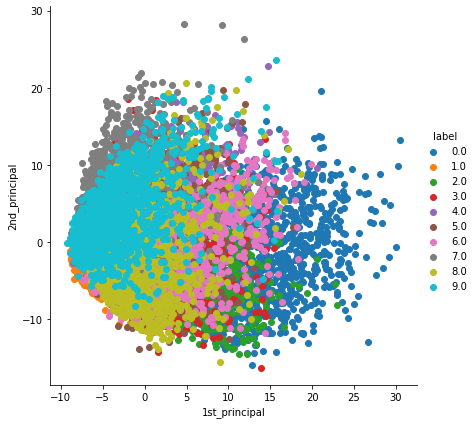

In [8]:
''
#comparaison avec sklearn 

# initializing the pca
from sklearn import decomposition
pca = decomposition.PCA()

# configuring the parameteres
# the number of components = 2
pca.n_components = 4
print(sample_data.shape)
print(standardized_data)
pca_data = pca.fit_transform(standardized_data)
# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)


# attaching the label for each 2-d data point 
pca_data = np.vstack((pca_data[:,0:2].T, labels)).T
import seaborn as sn
# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(pca_df, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()




(2, 784)
   1st_principal  2nd_principal  label
0      -5.043943      -5.560594    1.0
1      19.305698       6.191438    0.0
2      -7.678909      -1.910859    1.0
3      -0.464473       5.524075    4.0
4      26.644722       6.364069    0.0


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


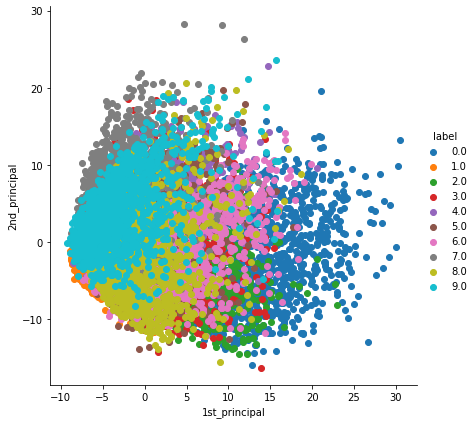

In [7]:


#II-Principal components computation
components=iterative_svd(sample_data,2)
print(components.shape)
#III-projection of original data on the PC
projection_coordinates=project_data_on_components(components)
#IV-Data Visualization of projection
data_visualize(projection_coordinates)